## Exercise 2.4 Evaluating Hyperparameters. Random Forest

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

2024-07-17 18:22:58.270411: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path = '/Users/mariazaremba/Documents/CareerFoundry/Machine Learning with Python'

In [3]:
climate_cleaned = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data','climate_cleaned_DATE.csv'), index_col = False)

In [4]:
climate_cleaned.head()

Unnamed: 0  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0           0                  7            0.85           1.018   
1           1                  6            0.84           1.018   
2           2                  8            0.90           1.018   
3           3                  3            0.92           1.018   
4           4                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  VALENTIA_cloud_cover  \
0              6.5             0.8            10.9  ...                     5   
1              6.1             3.3            10.1  ...                     7   
2              8.5             5.1             9.9  ...                     7   
3              6.3             3.8            10.6  ...                     7   
4              3.0            -0.7             6.0  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                    0.34                4.7                 8.5   
1                    0.84                0.7                 8.9   
2                    0.08                0.1                10.5   
3                    0.98                0.0                 7.4   
4                    0.00                5.7                 5.7   

   VALENTIA_temp_min  VALENTIA_temp_max      DATE  
0                6.0               10.9  19600101  
1                5.6               12.1  19600102  
2                8.1               12.9  19600103  
3                7.3               10.6  19600104  
4                3.0                8.4  19600105  

[5 rows x 137 columns]

In [5]:
climate_cleaned = climate_cleaned.drop('Unnamed: 0', axis=1)

In [6]:
climate_cleaned.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  VALENTIA_cloud_cover  \
0            10.9                     1  ...                     5   
1            10.1                     6  ...                     7   
2             9.9                     6  ...                     7   
3            10.6                     8  ...                     7   
4             6.0                     8  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   
2               0.91             1.0096                       0.17   
3               0.86             1.0184                       0.13   
4               0.80             1.0328                       0.46   

   VALENTIA_precipitation  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                    0.34                4.7                 8.5   
1                    0.84                0.7                 8.9   
2                    0.08                0.1                10.5   
3                    0.98                0.0                 7.4   
4                    0.00                5.7                 5.7   

   VALENTIA_temp_min  VALENTIA_temp_max      DATE  
0                6.0               10.9  19600101  
1                5.6               12.1  19600102  
2                8.1               12.9  19600103  
3                7.3               10.6  19600104  
4                3.0                8.4  19600105  

[5 rows x 136 columns]

In [7]:
climate_cleaned.shape

(22950, 136)

In [8]:
#Read in the pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [9]:
pleasantweather.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [10]:
pleasantweather.shape

(22950, 16)

In [11]:
#Reduce your dataset to only one decade
climate_filtered = climate_cleaned.loc[climate_cleaned['DATE'].astype(str).str[:4].isin(['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011'])] 

In [12]:
climate_filtered.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18628                  8            0.97          1.0232   
18629                  8            0.94          1.0234   
18630                  4            0.93          1.0254   
18631                  6            0.89          1.0208   
18632                  5            0.79          1.0142   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18628                    0.13                 0.00             0.0   
18629                    0.13                 0.00             0.0   
18630                    0.64                 0.00             6.1   
18631                    0.38                 0.00             1.0   
18632                    0.64                 0.06             6.5   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18628             -0.2            -0.8             0.3                     4   
18629             -0.2            -3.9             1.4                     8   
18630             -3.3            -5.2            -0.9                     7   
18631             -3.6            -5.8            -1.9                     4   
18632             -0.8            -5.4             2.5                     1   

       ...  VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
18628  ...                     5               0.82             1.0142   
18629  ...                     5               0.82             1.0142   
18630  ...                     5               0.82             1.0142   
18631  ...                     5               0.82             1.0142   
18632  ...                     5               0.82             1.0142   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
18628                       0.13                    0.41                3.4   
18629                       0.15                    0.41                3.4   
18630                       0.17                    0.41                3.4   
18631                       0.22                    0.41                3.4   
18632                       0.23                    0.41                3.4   

       VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max      DATE  
18628                10.7                7.9                6.6  20110101  
18629                10.7                7.9                5.4  20110102  
18630                10.7                7.9                4.5  20110103  
18631                10.7                7.9                7.9  20110104  
18632                10.7                7.9                7.8  20110105  

[5 rows x 136 columns]

In [13]:
climate_filtered.shape

(3653, 136)

In [14]:
#Reduce your dataset to only one decade
pleasantweather_filtered = pleasantweather.loc[pleasantweather['DATE'].astype(str).str[:4].isin(['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011'])] #<-----INSERT YEAR HERE

In [15]:
pleasantweather_filtered.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18628  20110101                       0                          0   
18629  20110102                       0                          0   
18630  20110103                       0                          0   
18631  20110104                       0                          0   
18632  20110105                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18628                          0                        0   
18629                          0                        0   
18630                          0                        0   
18631                          0                        0   
18632                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18628                            0                          0   
18629                            0                          0   
18630                            0                          0   
18631                            0                          0   
18632                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18628                        0                           0   
18629                        0                           0   
18630                        0                           0   
18631                        0                           0   
18632                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18628                            0                        0   
18629                            0                        0   
18630                            0                        0   
18631                            0                        0   
18632                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18628                          0                      0   
18629                          0                      0   
18630                          0                      0   
18631                          0                      0   
18632                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
18628                           0                           0   
18629                           0                           0   
18630                           0                           0   
18631                           0                           0   
18632                           0                           0   

       VALENTIA_pleasant_weather  
18628                          0  
18629                          0  
18630                          0  
18631                          0  
18632                          0

In [16]:
pleasantweather_filtered.shape

(3653, 16)

In [17]:
climate_filtered = climate_filtered.drop('DATE', axis=1)
pleasantweather_filtered = pleasantweather_filtered.drop('DATE', axis=1)

In [18]:
climate_filtered.shape

(3653, 135)

In [19]:
pleasantweather_filtered.shape

(3653, 15)

In [20]:
X = climate_filtered
y = pleasantweather_filtered

In [21]:
print(X.shape)
print(y.shape)

(3653, 135)
(3653, 15)


In [22]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [23]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2922, 135) (2922, 15)
(731, 135) (731, 15)


## GRID SEARCH

In [24]:
# creating a RF classifier
clf = RandomForestClassifier()

In [25]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [26]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.402 total time=   0.2s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.364 total time=   0.9s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.369 total time=   1.8s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.372 total time=   1.9s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.372 total time=   1.0s
[CV 1/3] EN

[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.408 total time=   1.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.372 total time=   1.8s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.410 total time=   1.9s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.367 total time=   1.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.366 total time=   1.9s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples

[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.373 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.378 total time=   1.0s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.410 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.362 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split

[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.360 total time=   0.1s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.407 total time=   1.9s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.371 total time=   0.9s
[CV 3/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.367 total time=   1.9s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.411 total time=   1.9s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_s

[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.420 total time=   0.3s[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.466 total time=   2.0s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.438 total time=   1.8s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=3, min_samples_split=1,

[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.401 total time=   0.2s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.395 total time=   0.2s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.438 total time=   1.6s
[CV 1/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.440 total time=   3.0s
[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.399 total time=   1.5s
[CV 3/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.418 total time=   3.1s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.414 total time=   3.7s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_sampl

[CV 2/3] END max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.393 total time=   3.1s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.439 total time=   1.8s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.448 total time=   0.2s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.399 total time=   0.2s
[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.437 total time=   0.2s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.464 total time=   1.9s
[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.463 total time=   3.6s
[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=2, min_sample

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parame

Search took 8.511268814404806 minutes


In [27]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.5376454483230664


## RANDOM SEARCH

In [28]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [29]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [30]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits

[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.455 total time=   0.3s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.479 total time=   2.2s
[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.483 total time=   4.4s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.424 total time=   2.1s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.454 total time=   4.9s
[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.430 total time=   4.2s
[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.450 total time=   2.3s
[CV 1/

[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.446 total time=   1.6s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.458 total time=   0.2s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.412 total time=   0.2s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.415 total time=   0.2s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.472 total time=   1.7s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.435 total time=   1.6s
[CV 1/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=3, min_sampl

[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.528 total time=   5.5s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.475 total time=   3.9s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.518 total time=   8.2s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.492 total time=   7.9s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.543 total time=   7.3s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.485 total time=   3.4s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.509 total time=   6.8s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3,

[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.506 total time=   0.4s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.462 total time=   0.4s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.483 total time=   0.4s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.552 total time=   3.9s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.480 total time=   8.3s
[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.557 total time=   7.5s
[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.491 total time=   4.0s
[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=2, mi

[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.479 total time=   3.6s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.412 total time=   2.2s
[CV 3/3] END max_depth=None, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.450 total time=   3.5s
[CV 2/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.425 total time=   3.2s
[CV 1/3] END max_depth=None, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.470 total time=   3.1s
[CV 2/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.445 total time=   2.9s
[CV 3/3] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.479 total time=   5.8s
[CV 2/3] END max_depth=None, max_features=3, min

Search took 24.328735752900442 minutes


In [31]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 360}
Best RANDOM search score is: 0.5284052019164955


In [32]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.5376454483230664
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 360}
Best RANDOM search score is: 0.5284052019164955


In [33]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 410, max_depth=None, max_features=2, min_samples_leaf=1, min_samples_split=4, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=2, min_samples_split=4,
                       n_estimators=410)

In [35]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5239398084815321


In [36]:
prediction = ['BAD WEATHER',
       'GOOD WEATHER'
      ]

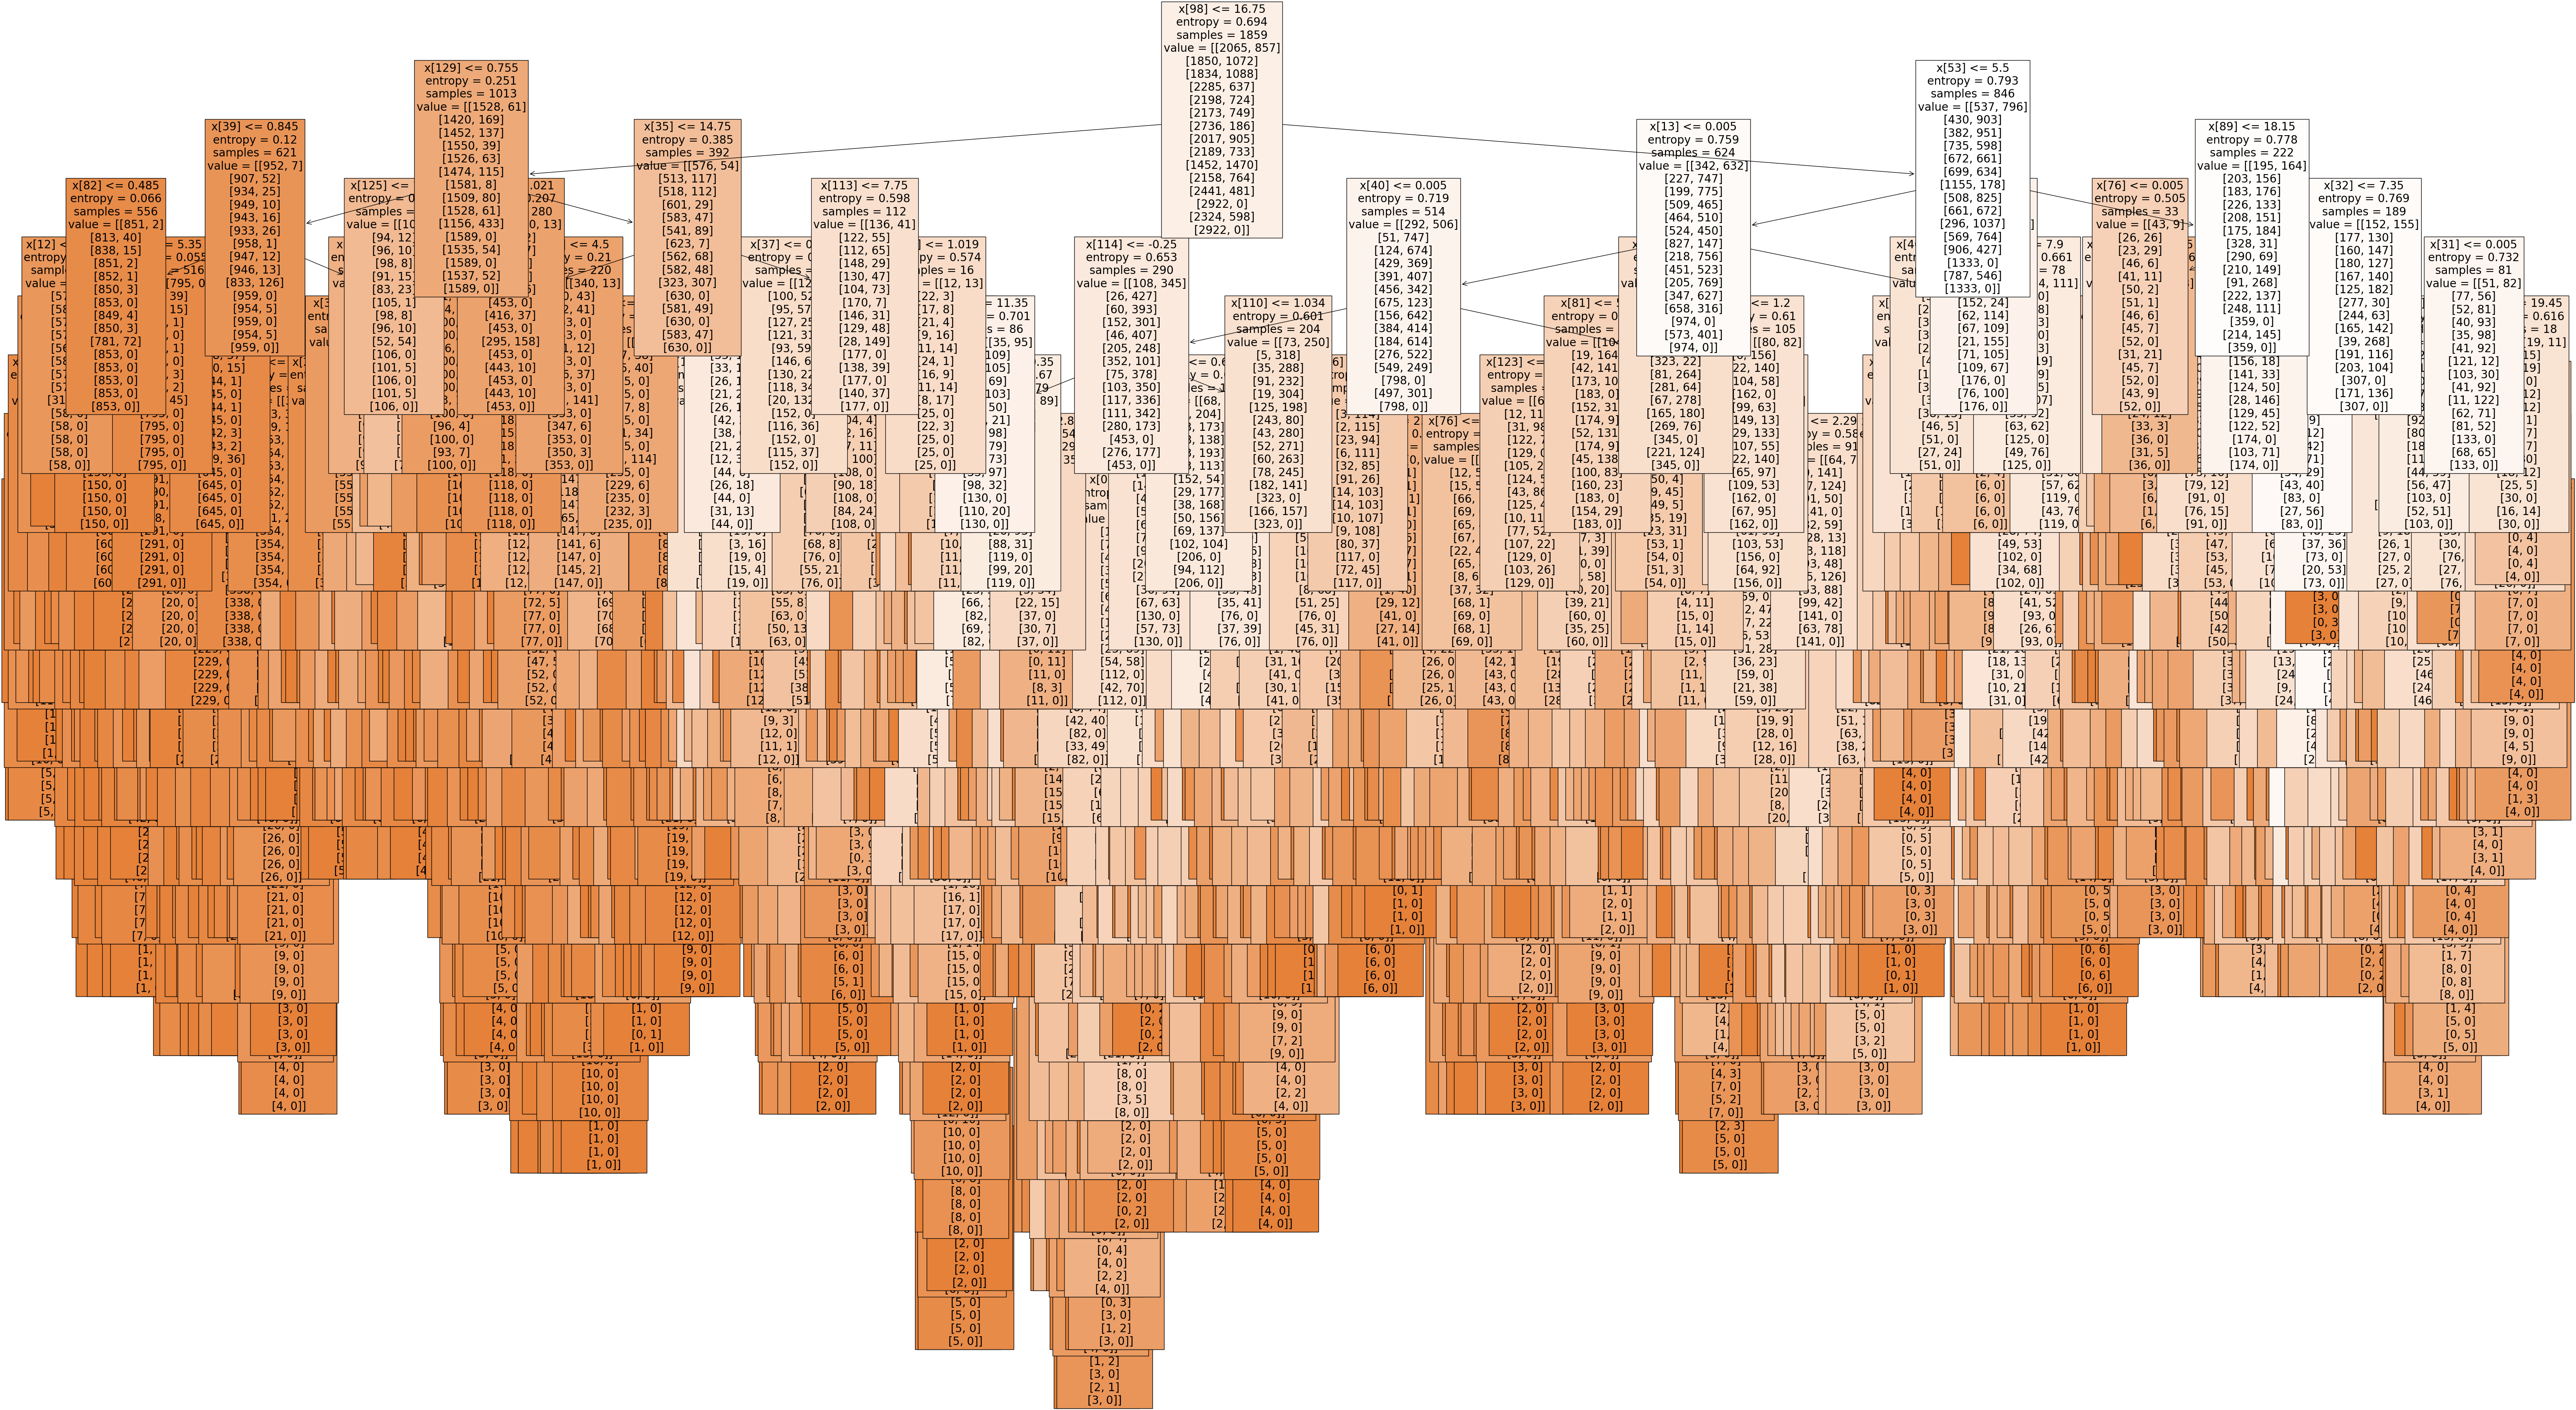

[CV 1/3] END criterion=entropy, max_depth=90, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=260;, score=0.517 total time=  11.9s
[CV 2/3] END criterion=entropy, max_depth=80, max_features=6, min_samples_leaf=2, min_samples_split=8, n_estimators=460;, score=0.484 total time=  25.3s
[CV 3/3] END criterion=entropy, max_depth=10, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=460;, score=0.503 total time=  22.2s
[CV 3/3] END criterion=gini, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=60;, score=0.470 total time=   1.5s
[CV 2/3] END criterion=gini, max_depth=90, max_features=1, min_samples_leaf=3, min_samples_split=8, n_estimators=110;, score=0.426 total time=   1.9s
[CV 2/3] END criterion=entropy, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=4, n_estimators=10;, score=0.409 total time=   0.4s
[CV 1/3] END criterion=gini, max_depth=50, max_features=2, min_samples_leaf=3, min_samples

[CV 3/3] END criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=310;, score=0.466 total time=  10.5s
[CV 1/3] END criterion=gini, max_depth=40, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=460;, score=0.527 total time=  13.6s
[CV 3/3] END criterion=gini, max_depth=40, max_features=4, min_samples_leaf=2, min_samples_split=4, n_estimators=460;, score=0.489 total time=  13.7s
[CV 1/3] END criterion=entropy, max_depth=90, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=160;, score=0.545 total time=  10.1s
[CV 2/3] END criterion=gini, max_depth=None, max_features=5, min_samples_leaf=3, min_samples_split=6, n_estimators=310;, score=0.468 total time=   8.6s
[CV 2/3] END criterion=gini, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=460;, score=0.446 total time=  10.8s
[CV 1/3] END criterion=gini, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_s

[CV 3/3] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=10;, score=0.436 total time=   0.6s
[CV 1/3] END criterion=entropy, max_depth=40, max_features=3, min_samples_leaf=2, min_samples_split=8, n_estimators=360;, score=0.502 total time=  13.4s
[CV 3/3] END criterion=entropy, max_depth=90, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=160;, score=0.524 total time=   9.8s
[CV 1/3] END criterion=gini, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=110;, score=0.485 total time=   2.1s
[CV 3/3] END criterion=gini, max_depth=30, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=110;, score=0.446 total time=   2.1s
[CV 3/3] END criterion=gini, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=460;, score=0.470 total time=  10.9s
[CV 2/3] END criterion=gini, max_depth=30, max_features=3, min_samples_leaf=3, min_samples_sp

[CV 2/3] END criterion=gini, max_depth=40, max_features=6, min_samples_leaf=3, min_samples_split=2, n_estimators=360;, score=0.483 total time=  12.7s
[CV 3/3] END criterion=entropy, max_depth=40, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=410;, score=0.484 total time=  25.0s
[CV 2/3] END criterion=entropy, max_depth=50, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=410;, score=0.426 total time=  12.4s
[CV 2/3] END criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=4, n_estimators=110;, score=0.441 total time=   3.7s
[CV 2/3] END criterion=entropy, max_depth=10, max_features=6, min_samples_leaf=3, min_samples_split=6, n_estimators=310;, score=0.477 total time=  15.8s
[CV 3/3] END criterion=entropy, max_depth=10, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=460;, score=0.486 total time=  19.4s
[CV 3/3] END criterion=entropy, max_depth=60, max_features=5, min_samples_leaf=1, m

In [38]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, class_names=prediction, filled=True);

In [40]:
np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([5.20852685e-03, 6.64025152e-03, 4.93287042e-03, 7.43740896e-03,
       8.03945086e-03, 1.17282421e-02, 1.43721978e-02, 9.78684347e-03,
       1.76544978e-02, 5.14433370e-03, 5.03253183e-03, 5.13596186e-03,
       5.44969006e-03, 6.48649331e-03, 5.65919923e-03, 9.29802938e-03,
       9.78612597e-03, 9.43297612e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.11652165e-03, 7.36626120e-03, 1.67648353e-03,
       1.51070230e-02, 9.00757477e-03, 1.32117723e-02, 4.14578345e-03,
       5.14429901e-03, 6.44718111e-03, 1.11512491e-02, 7.78110280e-03,
       7.44898726e-03, 1.30111461e-02, 7.62753350e-03, 1.45338444e-02,
       4.11641449e-03, 6.87967285e-03, 5.67758424e-03, 9.78832670e-03,
       9.45019064e-03, 8.95289874e-03, 1.68710599e-02, 9.36858111e-03,
       1.90970321e-02, 4.22318129e-03, 6.18501189e-03, 5.36530698e-03,
       8.79461746e-03, 5.64691417e-03, 6.44910432e-03, 1.18864786e-02,
       6.83068202e-03, 5.04579753e-03, 1.52206788e-02, 2.79490396e-03,
      

In [41]:
np.set_printoptions(threshold=1000)

In [42]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[5.20852685e-03, 6.64025152e-03, 4.93287042e-03, 7.43740896e-03,
         8.03945086e-03, 1.17282421e-02, 1.43721978e-02, 9.78684347e-03,
         1.76544978e-02],
        [5.14433370e-03, 5.03253183e-03, 5.13596186e-03, 5.44969006e-03,
         6.48649331e-03, 5.65919923e-03, 9.29802938e-03, 9.78612597e-03,
         9.43297612e-03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.11652165e-03,
         7.36626120e-03, 1.67648353e-03, 1.51070230e-02, 9.00757477e-03,
         1.32117723e-02],
        [4.14578345e-03, 5.14429901e-03, 6.44718111e-03, 1.11512491e-02,
         7.78110280e-03, 7.44898726e-03, 1.30111461e-02, 7.62753350e-03,
         1.45338444e-02],
        [4.11641449e-03, 6.87967285e-03, 5.67758424e-03, 9.78832670e-03,
         9.45019064e-03, 8.95289874e-03, 1.68710599e-02, 9.36858111e-03,
         1.90970321e-02],
        [4.22318129e-03, 6.18501189e-03, 5.36530698e-03, 8.79461746e-03,
         5.64691417e-03, 6.44910432e-03, 1.18864786e-02, 6.83068202

In [43]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.08580029, 0.06142534, 0.04848564, 0.07729113, 0.09020176,
       0.06042709, 0.04246234, 0.08072753, 0.08106086, 0.07903238,
       0.08586608, 0.06659612, 0.0590211 , 0.07524975, 0.00635259])

In [44]:
stations = [
    'BASEL',
    'BELGRADE',
    'BUDAPEST',
    'DEBILT',
    'DUSSELDORF',
    'HEATHROW',
    'KASSEL',
    'LJUBLJANA',
    'MAASTRICHT',
    'MADRID',
    'MUNCHENB',
    'OSLO',
    'SONNBLICK',
    'STOCKHOLM',
    'VALENTIA'
]

In [45]:
important = pd.Series(sumarray, index = stations).sort_values(ascending=False)
important

DUSSELDORF    0.090202
MUNCHENB      0.085866
BASEL         0.085800
MAASTRICHT    0.081061
LJUBLJANA     0.080728
MADRID        0.079032
DEBILT        0.077291
STOCKHOLM     0.075250
OSLO          0.066596
BELGRADE      0.061425
HEATHROW      0.060427
SONNBLICK     0.059021
BUDAPEST      0.048486
KASSEL        0.042462
VALENTIA      0.006353
dtype: float64

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


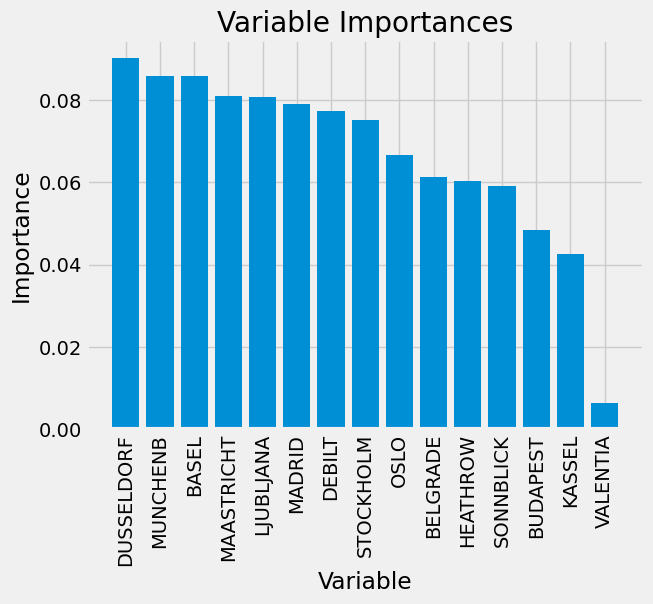

In [46]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(stations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, important.index, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## DUSSELDORF

In [47]:
# Select columns that start with 'DUSSELDORF_'
DUSSELDORF_columns = [col for col in climate_cleaned.columns if col.startswith('DUSSELDORF_')]

# Create the new DataFrame with the selected columns
climate_DUSSELDORF = climate_cleaned[DUSSELDORF_columns]

In [48]:
pleasantweather_DUSSELDORF = pleasantweather[['DUSSELDORF_pleasant_weather']]

In [49]:
X = climate_DUSSELDORF
y = pleasantweather_DUSSELDORF

In [50]:
print(X.shape)
print(y.shape)

(22950, 9)
(22950, 1)


In [51]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [52]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [53]:
# creating a RF classifier
clf4 = RandomForestClassifier(n_estimators = 100) #, max_depth=20)

In [54]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [57]:
start = time.time()
grid = GridSearchCV(clf4,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array

Search took 6.939558617273966 minutes


In [58]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


In [59]:
# creating a RF classifier with the best results from above
clf4 = RandomForestClassifier(n_estimators = 10, max_depth=3, max_features=7, min_samples_leaf=2, min_samples_split=2, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf4.fit(X_train, y_train)

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=3, max_features=7,
                       min_samples_leaf=2, n_estimators=10)

In [60]:
# performing predictions on the test dataset
y_pred = clf4.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


In [61]:
pred = ['Bad weather','Good weather']

[Text(0.375, 0.875, 'x[8] <= 17.95\nentropy = 0.757\nsamples = 11681\nvalue = [14353, 4007]\nclass = Bad weather'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 7271\nvalue = [11456, 0]\nclass = Bad weather'),
 Text(0.5, 0.625, 'x[0] <= 4.5\nentropy = 0.981\nsamples = 4410\nvalue = [2897, 4007]\nclass = Good weather'),
 Text(0.25, 0.375, 'x[4] <= 0.005\nentropy = 0.59\nsamples = 2027\nvalue = [447, 2696]\nclass = Good weather'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 1732\nvalue = [0, 2696]\nclass = Good weather'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 295\nvalue = [447, 0]\nclass = Bad weather'),
 Text(0.75, 0.375, 'x[4] <= 0.005\nentropy = 0.933\nsamples = 2383\nvalue = [2450, 1311]\nclass = Bad weather'),
 Text(0.625, 0.125, 'entropy = 0.483\nsamples = 923\nvalue = [153, 1311]\nclass = Good weather'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 1460\nvalue = [2297, 0]\nclass = Bad weather')]

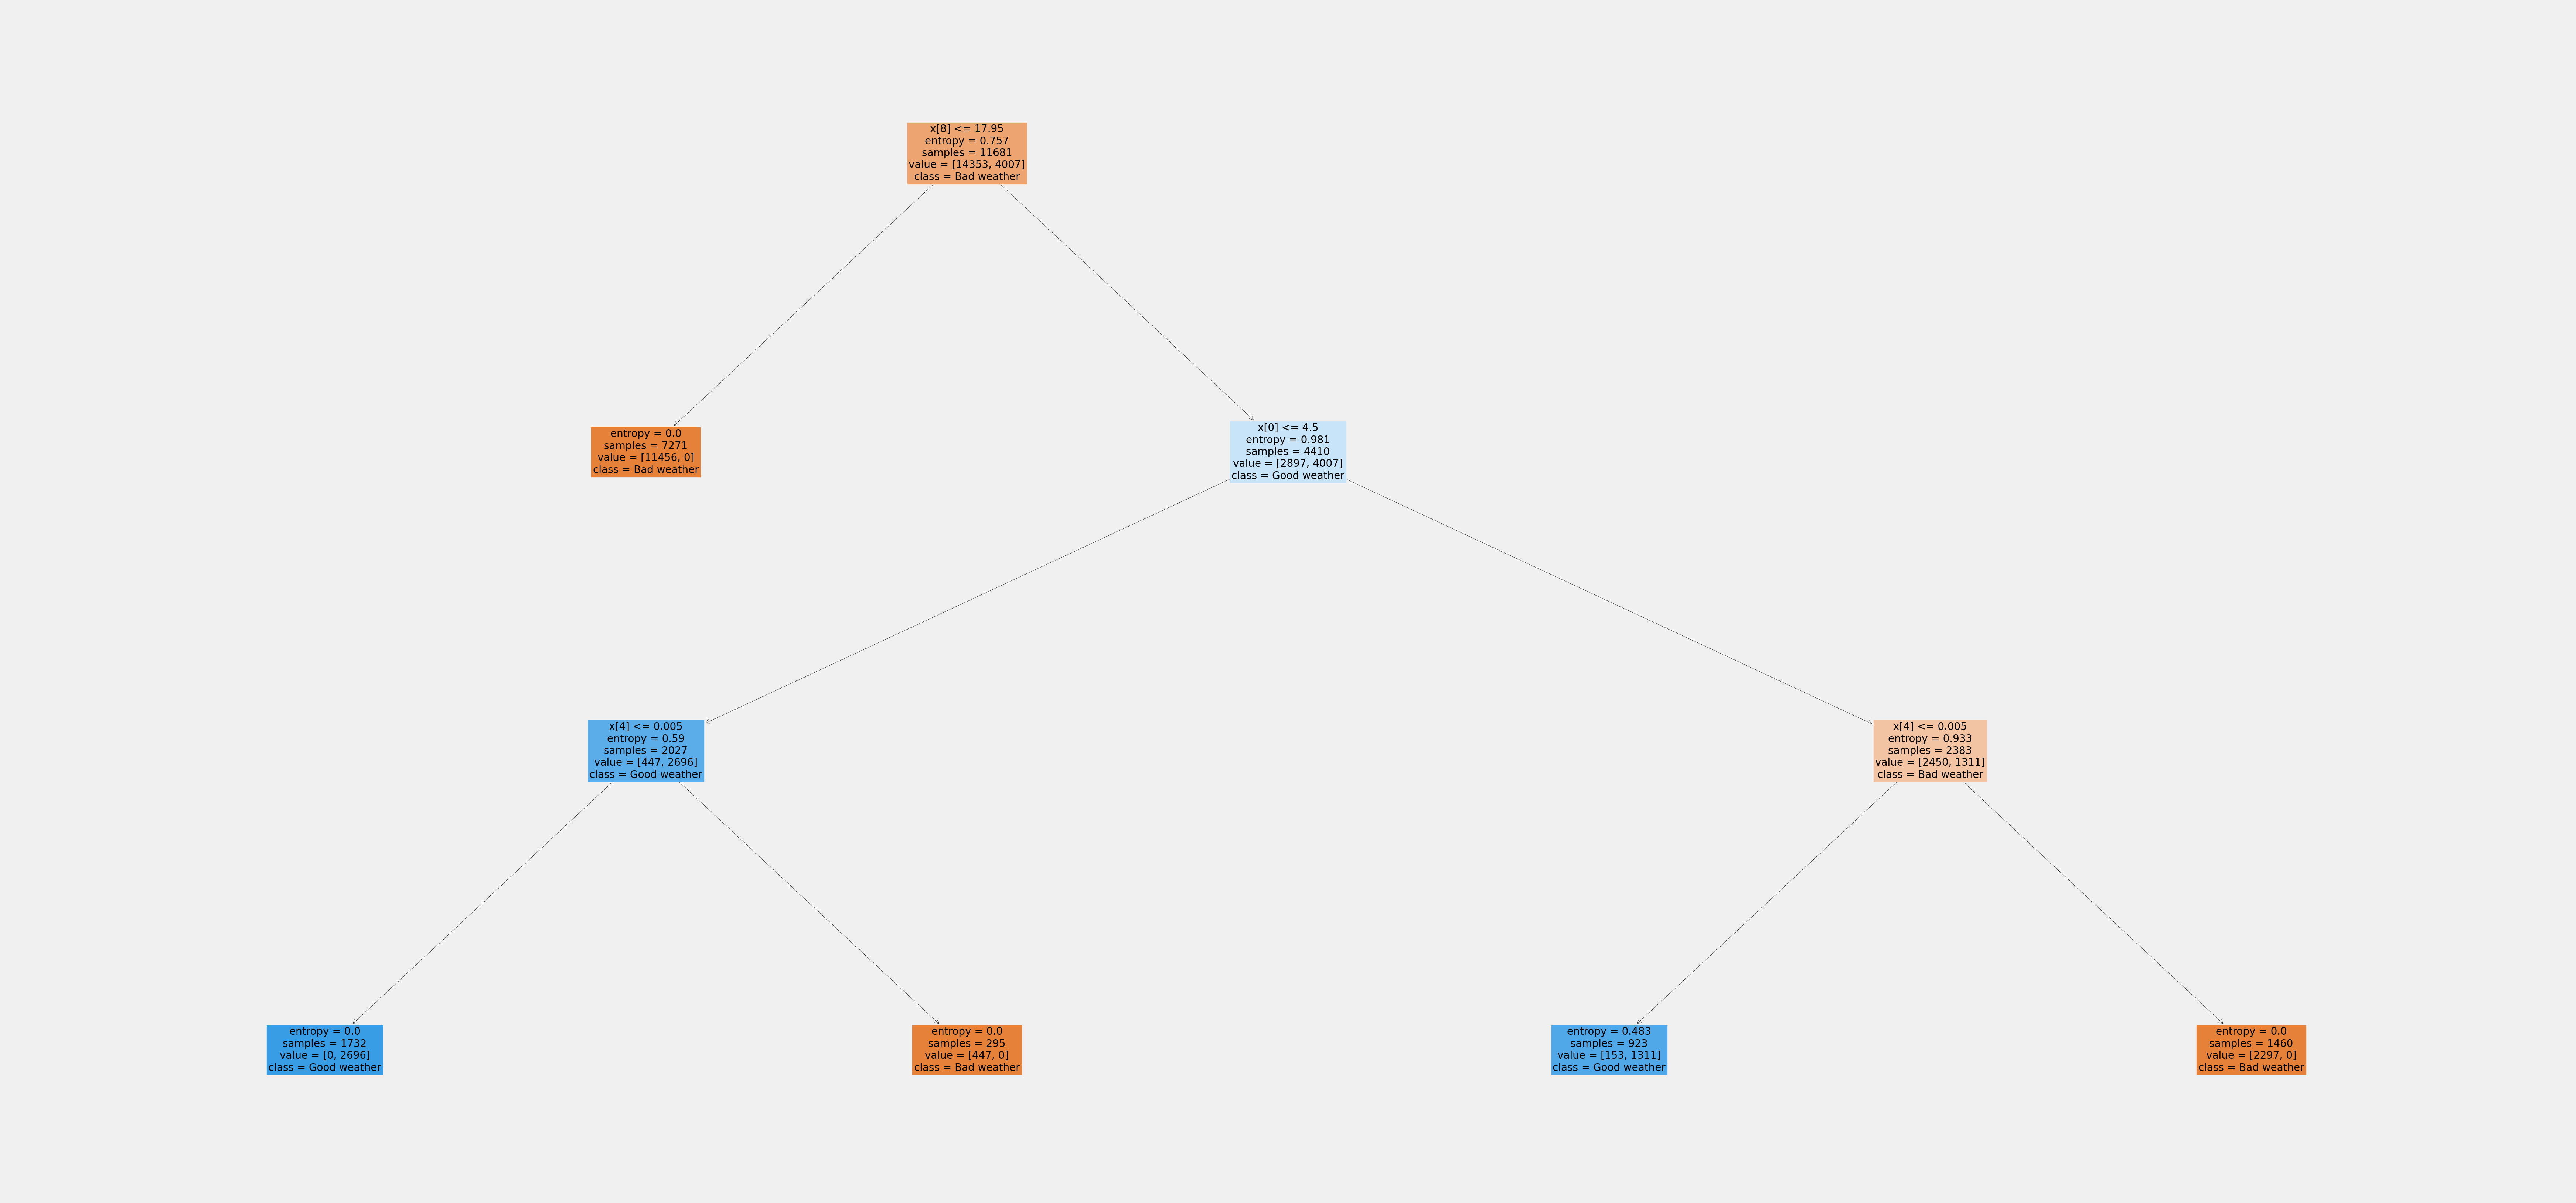

In [62]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf4.estimators_[5], fontsize = 20, class_names=pred, filled=True)

In [64]:
np.set_printoptions(threshold=np.inf)
newarray = clf4.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.01070502, 0.        , 0.        , 0.00373218, 0.3887498 ,
       0.04794019, 0.04332615, 0.        , 0.50554667])

In [65]:
np.set_printoptions(threshold=1000)

In [66]:
variables = [
    'Cloud cover',
    'Humidity',
    'Pressure',
    'Global ratiation',
    'Precipitation',
    'Sunshine',
    'Temp mean',
    'Temp min',
    'Temp max'
]

In [67]:
important = pd.Series(newarray, index = variables).sort_values(ascending = False)
important

Temp max            0.505547
Precipitation       0.388750
Sunshine            0.047940
Temp mean           0.043326
Cloud cover         0.010705
Global ratiation    0.003732
Humidity            0.000000
Pressure            0.000000
Temp min            0.000000
dtype: float64

['Cloud cover', 'Humidity', 'Pressure', 'Global ratiation', 'Precipitation', 'Sunshine', 'Temp mean', 'Temp min', 'Temp max']


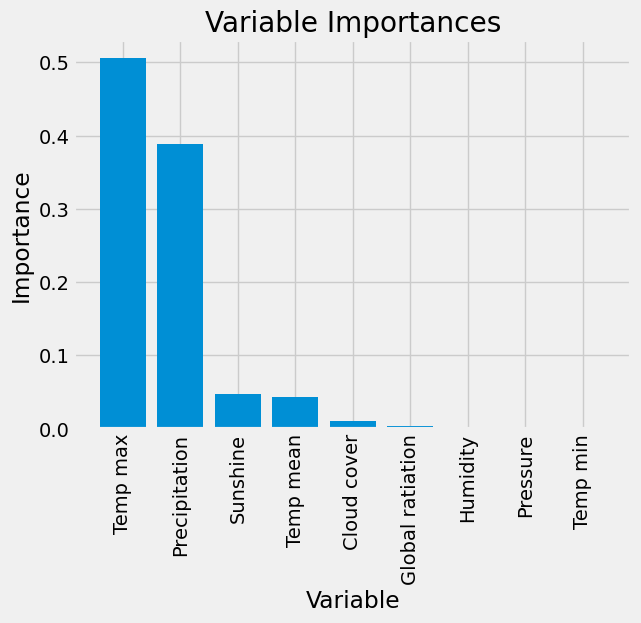

In [69]:
%matplotlib inline

plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(important)))
print(variables)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, important.index, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');